# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [59]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [60]:
def apply_svd_custom(X_train, X_test, n_components):
    X_train_mean = np.mean(X_train, axis=0)
    X_train_centered = X_train - X_train_mean # subtract mean to center data
    
    covariance_matrix = np.dot(X_train_centered.T, X_train_centered)
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    
    # sort eigen{vals,vecs} in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    
    # clip small or negative vals to small positive val
    eigenvalues = np.clip(eigenvalues, a_min=1e-10, a_max=None)
    
    Vt_reduced = eigenvectors[:, :n_components]  # top n_components right singular vecs
    singular_values = np.sqrt(eigenvalues[:n_components])
    U_reduced = np.dot(X_train_centered, Vt_reduced) / singular_values # U=left singular vecs
    
    X_train_reduced = U_reduced * singular_values # reduce training data to n_components
    
    X_test_centered = X_test - X_train_mean
    X_test_reduced = np.dot(X_test_centered, Vt_reduced) # center test set
    
    return X_train_reduced, X_test_reduced, Vt_reduced

## Part 3: Train Logistic Regression and Measure Performance

In [61]:
def train_logistic_regression(X_train_reduced, y_train, X_test_reduced, y_test):
    start_time = time.time()
    
    clf = LogisticRegression(max_iter=200) # train
    clf.fit(X_train_reduced, y_train)
    
    y_pred = clf.predict(X_test_reduced) # test
    accuracy = accuracy_score(y_test, y_pred)
    
    end_time = time.time()
    training_time = end_time - start_time # record time
    
    return accuracy, training_time

## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [62]:
svd_components = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512]
results = []
Vt_reduced_list = []

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")
    
    X_train_svd, X_test_svd, Vt_reduced = apply_svd_custom(X_train, X_test, n_components)
    Vt_reduced_list.append(Vt_reduced)
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)
    
    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")
    results.append((n_components, accuracy, training_time))

Training models with different levels of SVD preprocessing...
Applying custom SVD with 1 components...
SVD components: 1, Accuracy: 0.3071, Training time: 0.3073 seconds
Applying custom SVD with 2 components...
SVD components: 2, Accuracy: 0.4484, Training time: 0.7591 seconds
Applying custom SVD with 4 components...
SVD components: 4, Accuracy: 0.5766, Training time: 0.9617 seconds
Applying custom SVD with 8 components...
SVD components: 8, Accuracy: 0.7871, Training time: 1.0707 seconds
Applying custom SVD with 16 components...
SVD components: 16, Accuracy: 0.8561, Training time: 1.3175 seconds
Applying custom SVD with 32 components...
SVD components: 32, Accuracy: 0.8974, Training time: 2.1785 seconds
Applying custom SVD with 64 components...
SVD components: 64, Accuracy: 0.9136, Training time: 1.7798 seconds
Applying custom SVD with 128 components...
SVD components: 128, Accuracy: 0.9196, Training time: 3.4356 seconds
Applying custom SVD with 256 components...
SVD components: 256, 

## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


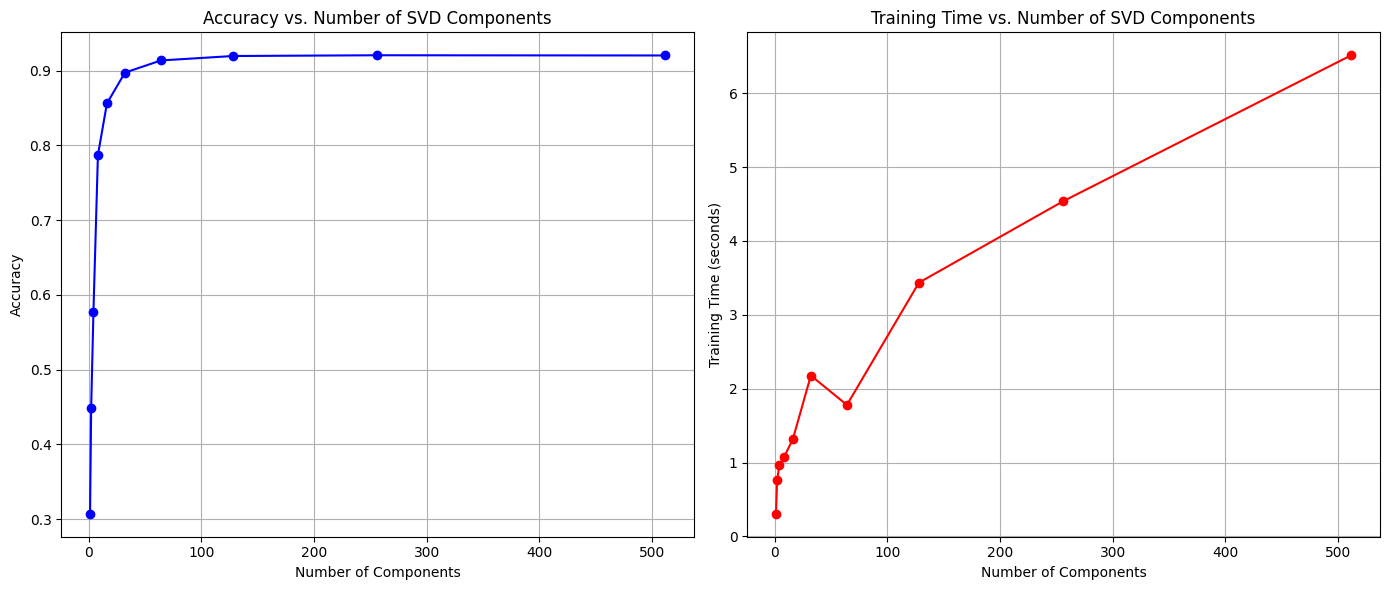

In [77]:
# plot the results
n_components_list, accuracies, training_times = zip(*results)
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(n_components_list, accuracies, marker='o', color='b')
plt.title('Accuracy vs. Number of SVD Components')
plt.xlabel('Number of Components')
plt.ylabel('Accuracy')
plt.grid(True)

# plot training time vs. number of components
plt.subplot(1, 2, 2)
plt.plot(n_components_list, training_times, marker='o', color='r')
plt.title('Training Time vs. Number of SVD Components')
plt.xlabel('Number of Components')
plt.ylabel('Training Time (seconds)')
plt.grid(True)

plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

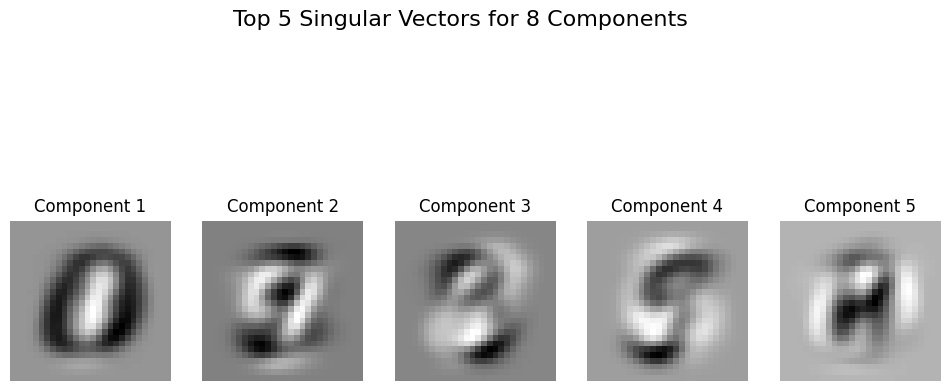

Difference from previous Vt_reduced (n_components=16):
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


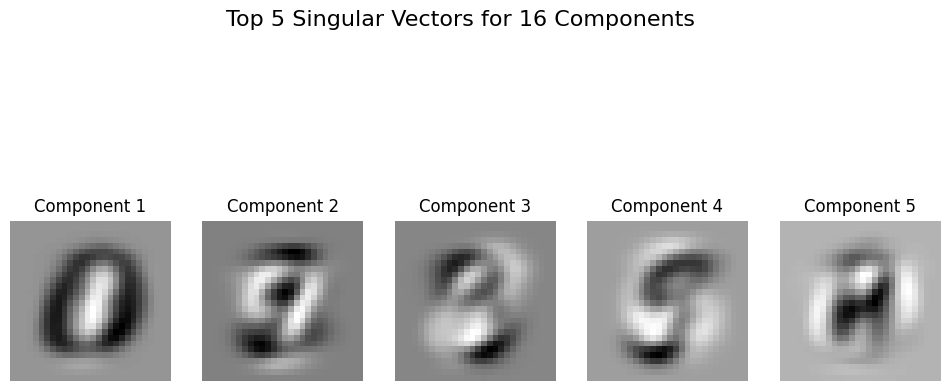

Difference from previous Vt_reduced (n_components=32):
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


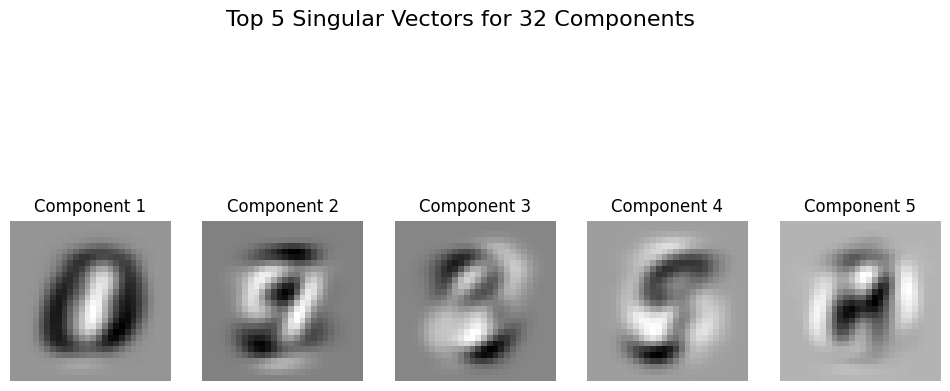

Difference from previous Vt_reduced (n_components=64):
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


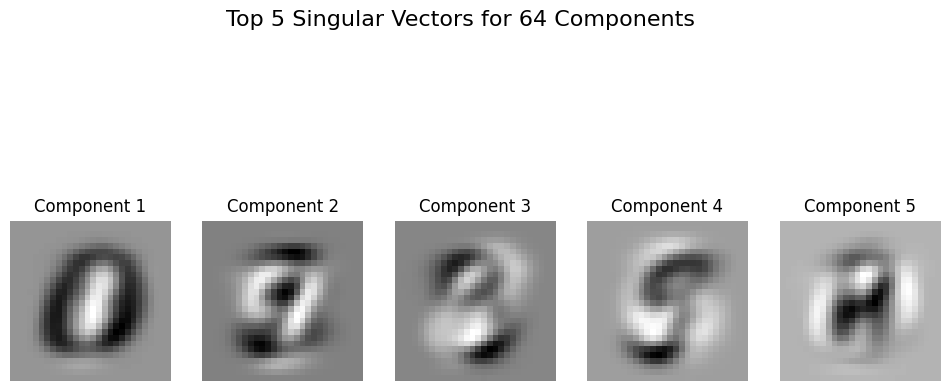

Difference from previous Vt_reduced (n_components=128):
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


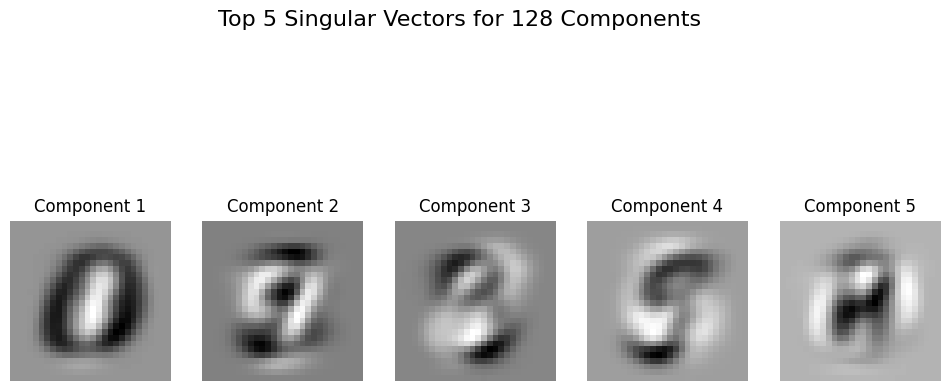

Difference from previous Vt_reduced (n_components=256):
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


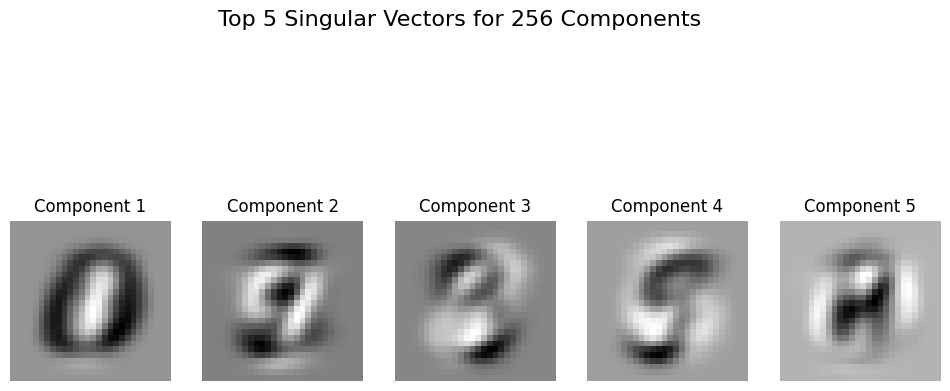

Difference from previous Vt_reduced (n_components=512):
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


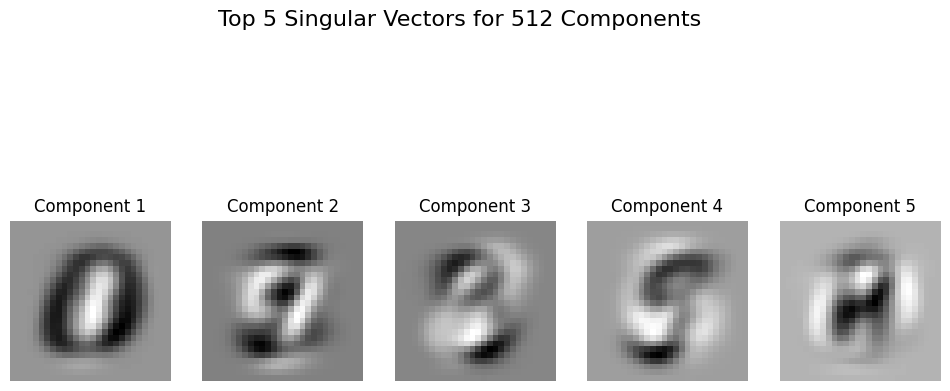

In [70]:
import numpy as np
import matplotlib.pyplot as plt

previous_Vt_reduced = None

for idx, n_components in enumerate(svd_components): # visualize top 5 singular vecs for each component size
    Vt_reduced = Vt_reduced_list[idx]  # Get the current Vt_reduced
    plt.figure(figsize=(12, 6))
    
    if n_components < 5:
        continue
    
    if previous_Vt_reduced is not None:
        difference = np.abs(Vt_reduced[:,:5] - previous_Vt_reduced[:,:5])
        print(f"Difference from previous Vt_reduced (n_components={n_components}):")
        print(difference[:5])
    
    for i in range(5):
        plt.subplot(1, 5, i + 1)
        plt.imshow(Vt_reduced[:, i].reshape(28, 28), cmap='gray')  # reshape for visualization
        plt.title(f"Component {i + 1}")
        plt.axis('off')
    
    plt.suptitle(f'Top 5 Singular Vectors for {n_components} Components', fontsize=16)
    plt.show()
    
    previous_Vt_reduced = Vt_reduced

## Part 6: Analyze / Conclusion 

YOUR ANSWER: Accuracy for SVD has diminishing returns after 32 components on the MNIST dataset. Surprisingly it achieves around 30% accuracy with 1 component. Training time after past 100 components seems to be linear. Strangely enough, the visualization of the top 5 singular vectors look identical. I printed out their differences and got a matrix of all 0s. Perhaps this is because my first visualization is for n=16 components and past this the top 5 singular vectors have converged across further additions of components. It's interesting how the first singular vector captures a loop then the next a quasi-4,7, or 9. The remaining 3 look like 8s or 9s. I think of this as extracting the most different features of the images to most quickly separate the image into a bin (e.g. a decision tree of feature proximity, with leaf nodes as number bins, [0,9]).